# Text Classfication

## Goal:Given a set of text movie reviews that have been labeled negative or positive

## About Dataset
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("moviereviews.csv")

In [3]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.describe().transpose()

,count,unique,top,freq
label,2000,2,neg,1000
review,1965,1939,,27


###  Check any missing values present in the data

In [6]:
df.isnull().sum()

label      0
review    35
dtype: int64

### Drop the missings values which are present in the data

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


### Lets Check any Blank strings and not just NaN 

In [10]:
s=""

In [11]:
s.isspace()

False

In [12]:
s=" "

In [13]:
s.isspace()

True

In [14]:
df["review"].str.isspace()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [15]:
df[df["review"].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [16]:
df= df[~df["review"].str.isspace()]   # ~ indicates inverse

In [17]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [18]:
df[df['review'].apply(lambda review : review==" ")]

,label,review


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


### confirm the value counts per label

In [20]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

We figure out how to use CountVectorizer model to get the top 20 words (that are not english stop words)per label type

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer(stop_words='english')

In [23]:
matrix = vectorizer.fit_transform(df[df['label'] == 'neg']['review'])
freqs = zip(vectorizer.get_feature_names(), matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for negative reviews')
print(sorted(freqs, key=lambda x: -x[1])[:20])


Top 20 words used for negative reviews
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
matrix = vectorizer.fit_transform(df[df['label'] == 'pos']['review'])
freqs = zip(vectorizer.get_feature_names(), matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for positive reviews')
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for positive reviews
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


## Training and Data
slpit the data into x and y feature and then perform tarin test split

In [25]:
X=df['review']
y=df['label']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Mode
Create a Pipeline that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [29]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('SVC', LinearSVC())  
])

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('SVC', LinearSVC())])

### lets create a classification report and plot a confusion matrix based on the resluts of your pipeline

In [31]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

In [32]:
y_pred = pipeline.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.86      0.86      0.86       188
         pos       0.87      0.87      0.87       200

    accuracy                           0.87       388
   macro avg       0.87      0.87      0.87       388
weighted avg       0.87      0.87      0.87       388



C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


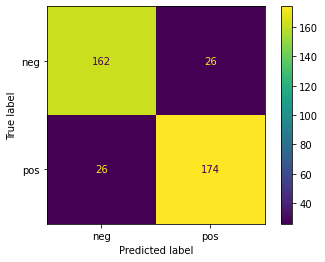

In [34]:
plot_confusion_matrix(pipeline,X_test,y_test)